# Proyecto integrado


## Descripción del proyecto

Durante este proyecto, trabajaré con una base de datos de una tienda online a nivel mundial de venta de videojuegos. Utilizaré los datos del año 2016 para identificar diferentes patrones en los juegos con el fin de detectar proyectos interesantes y planificar campañas publicitarias futuras.

### Descripción de los datos:

Estare usando una tabla que contiene la siguiente información:

- Name (Nombre)
- Platform (Plataforma)
- Year_of_Release (Año de lanzamiento)
- Genre (Género)
- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
- EU_sales (ventas en Europa en millones de dólares estadounidenses)
- JP_sales (ventas en Japón en millones de dólares estadounidenses)
- Other_sales (ventas en otros países en millones de dólares estadounidenses)
- Critic_Score (máximo de 100)
- User_Score (máximo de 10)
- Clasificación (ESRB)

## Importación de librerías y archivos

A continuación, dare inicio al análisis importando las librerías que voy a utilizar durante el proyecto.

In [ ]:
# Importción de librerías

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import levene

Descargo el archivo que voy a utilizar de la empresa.

In [ ]:
# Descarga de archivo

df= pd.read_csv('/datasets/games.csv')


## Exploración y tratamiento de datos

Comenzaré con la investigación del archivo para ver si hay algún tipo de dato o columnas que haya que modificar. Analizaré también los valores ausentes para ver que hacer con ellos.

In [ ]:
# Exploración de la tabla
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Podemos observar que los nombres de las columnas tienen mayúsculas y minúsculas, voy a pasar todos los nombres a minúscula. También, hay columnas a los cuales les voy a cambiar el tipo de dato y analizare los valores ausentes para ver como tratarlos. 

In [ ]:
# Cambio nombre de columnas a minúscula

df= df.rename(columns=str.lower)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# Exploración columna name

df[df['name'].isna()] #tenemos dos juegos sin nombre.
df= df.dropna(subset=['name'])


En la columna 'name', había solo dos datos con valores ausentes y decidí eliminarlos. Al no tener el nombre no me sirve para hacer análisis ya que no puedo determinar a que juego pertenece la información y tampoco me afecta perder esos dos datos.

In [ ]:
# Exploración columna platform: todo ok

In [ ]:
# Exploración columna year of release

df[df['year_of_release'].isna()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# Creo una función para rellenar años ausentes

def rellenar_nan(x):
    años= set(x.dropna())
    if not años:
        return x
    año = años.pop()
    return x.fillna(año)



df.loc[:, "year_of_release"] = df.groupby('name')['year_of_release'] .apply(rellenar_nan)

df[df['year_of_release'].isna()]



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
# Cambio tipo de dato de la columna year os release
df['year_of_release']= df['year_of_release'].dropna()
df['year_of_release']= df['year_of_release'].astype('Int64')


In [ ]:
#exploración columna critic score

df['critic_score'].isna().sum() 


8576

En esta columna podemos observar que la mitad de los juegos no tiene críticas, las voy a dejar como estan para no alterar análisis futuros. 

In [ ]:
#Exploración columna user score

df[df['user_score']== 'tbd'] # son 2424 datos
df['user_score'].isna().sum()
df['user_score']= pd.to_numeric(df['user_score'], errors= 'coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Esta columna contiene datos 'tbd' (2424) y también valores ausentes. Voy a dejar esos datos sin rellenar para que no afecten futuros análisis.

In [ ]:
# Exploración de la columna rating

df['rating'].isna().sum() #valores 6764
df['rating']= df['rating'].fillna('unknown')

La columna rating contiene la valoracion ESRB. Al tener valores ausentes decidí rellenar esos campos por la palabra unknown. 

In [ ]:
#Calculo las ventas totales de todas las regiones 

df['ventas_totales']= df['na_sales']+ df['eu_sales']+ df['jp_sales']+ df['other_sales']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  ventas_totales   16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Análisis de datos

En este apartado daré inicio al análisis de los datos 

<AxesSubplot:title={'center':'Lanzamientos de juegos por año'}, xlabel='year_of_release'>

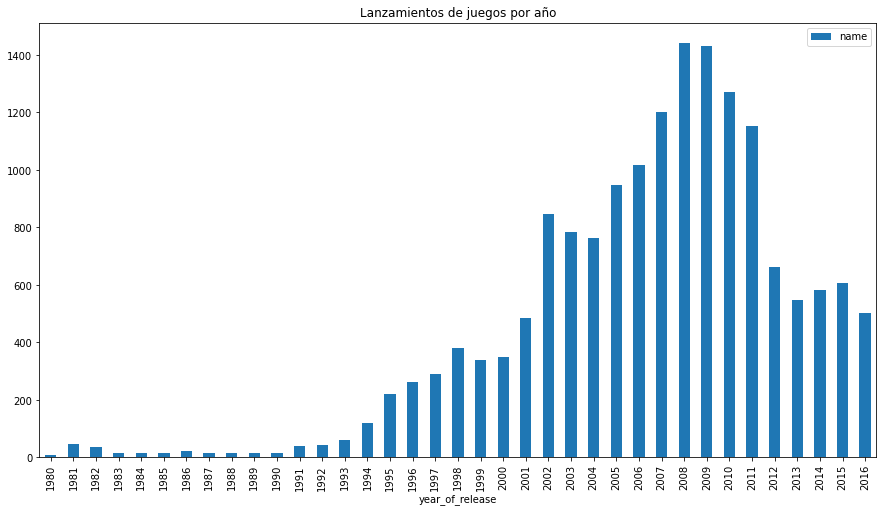

In [ ]:
# Lanzamiento de juegos por año

lanzamientos_por_año=df.query('year_of_release > 0').pivot_table(index= 'year_of_release', values='name', aggfunc='count')
lanzamientos_por_año.plot(kind= 'bar', figsize=(15,8), title='Lanzamientos de juegos por año')

Como muestra el gráfico de arriba, podemos observar que a partir de 1993 comienza un leve increment año a año llegando al pico máximo de lanzamientos de juegos en los años 2008 y 2009. A partir de estos años comenzo a bajar nuevamente la cantidad de lanzamientos relaizados.

In [ ]:
# Variación de ventas según plataforma

variacion_vtas= df.pivot_table(index='platform', values='ventas_totales', aggfunc='sum').sort_values(by='ventas_totales', ascending=False).head()
variacion_vtas

,ventas_totales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

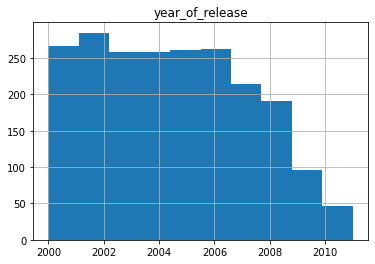

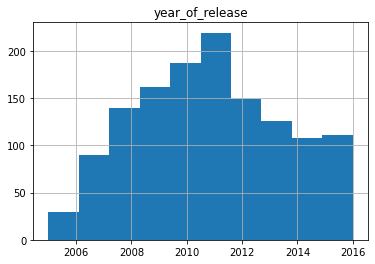

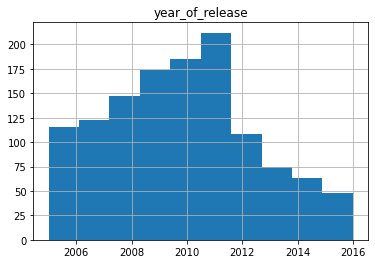

In [ ]:
# Distribuciones de ventas de las plataformas por año 

ps2= df.query('platform == "PS2"')
x360= df.query('platform == "X360"')
ps3= df.query('platform == "PS3"')

# 1 gráfico
ps2.hist('year_of_release')

# 2 gráfico
ps3.hist('year_of_release')

# 3 gráfico
x360.hist('year_of_release')


Como podemos observar, las plataformas con más ventas son PS2, X360 y PS3. Casualmente, lidera el ranking una plataforma que fue muy popular y que ahora no tiene ventas. También podemos observar, que PS2 alcanzó sus máximas ventas en 2006 y luego empezó a vender cada vez menos juegos al mismo tiempo que PS3, su sucesora comenzaba a crecer. PS3 alcanzó sus máximas ventas en 2011 y luego comenzo a descender lo que hace pensar que hay una sucesora en camino.

En el caso de X360, podemos ver que apareció en 2006 y fue vendiendo cada vez más juegos hasta alcanzar su máximo en el año 2011. Luego de ese año tuvo una abrupta caída en las ventas y continuó descendiendo año a año.

En los tres casos podemos observar que la etapa de crecimiento hasta alcanzar las máximas ventas de las plataformas es de 6 años aproximadamente mientras que los períodos en los que comienza a descender hasta el dia de la fecha es de aproximadamente 4 años.



A continuación segmentare los datos a partir del año 2013 en búsqueda de patrones para poder construir un modelo para el año 2017.

In [ ]:
# segmento los datos a partir de 2013

datos_segmentados= df.query('year_of_release >= 2013')
datos_segmentados.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [ ]:
# Busco plataforma más vendidos entre las segmentadas

ventas= datos_segmentados.pivot_table(index='platform', values='ventas_totales', aggfunc='sum').sort_values(by='ventas_totales', ascending=False).head()
ventas

,ventas_totales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


Como podemos observar, la plataforma con más ventas desde 2013 hasta la fecha es PS4 seguida por PS3 y XOne. Podemos ver que a su vez, dentro de las más vendidas, tenemos bastante diferencia entre una y otra. Liderando ampliamente las ventas tenemos a PS4. Despúes tenemos un segundo grupo compuesto por PS3 y XOne y un tercer grupo con muchas menos ventas compuesto por 3DS y X360.  

A continuación voy a explorar las ventas de estas plataformas en años anteriores para ver su comportamiento.

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

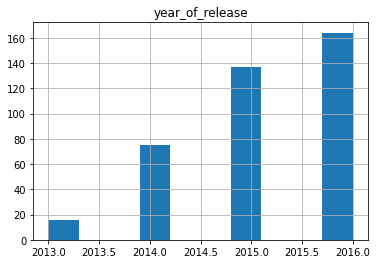

In [ ]:
# cantidad ventas PS4

ps4= df.query('platform == "PS4" ')
ps4.hist('year_of_release')

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

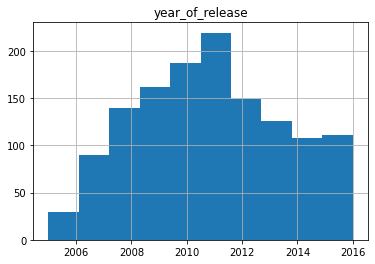

In [ ]:
# Cantidad ventas PS3

ps3= df.query('platform == "PS3" ')
ps3.hist('year_of_release')

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

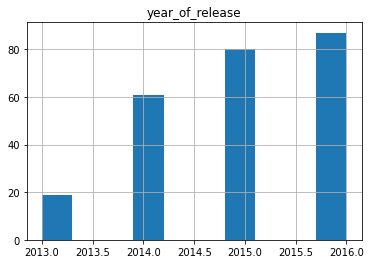

In [ ]:
# Cantidad ventas XOne

xone= df.query('platform == "XOne" ')
xone.hist('year_of_release')

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

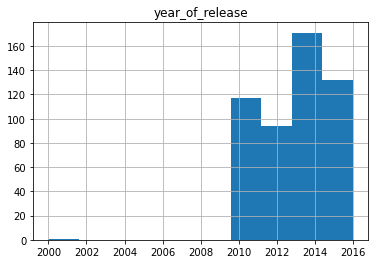

In [ ]:
# Cantidad de ventas 3DS

ds3= df.query('platform == "3DS"')
ds3.hist('year_of_release')

Como podemos observar, de las plataformas que tienen más ventas, PS4 y XOne son las dos que siguen en crecimiento. PS4 tiene el doble de ventas que su competidor más cercano. PS3 si bien es el segundo mas vendido se ve claramente como sus ventas fueron disminuyendo para darla paso a PS4. 3DS tuvo fluctuaciones en sus ventas.

<AxesSubplot:title={'center':'ventas_totales'}, xlabel='platform'>

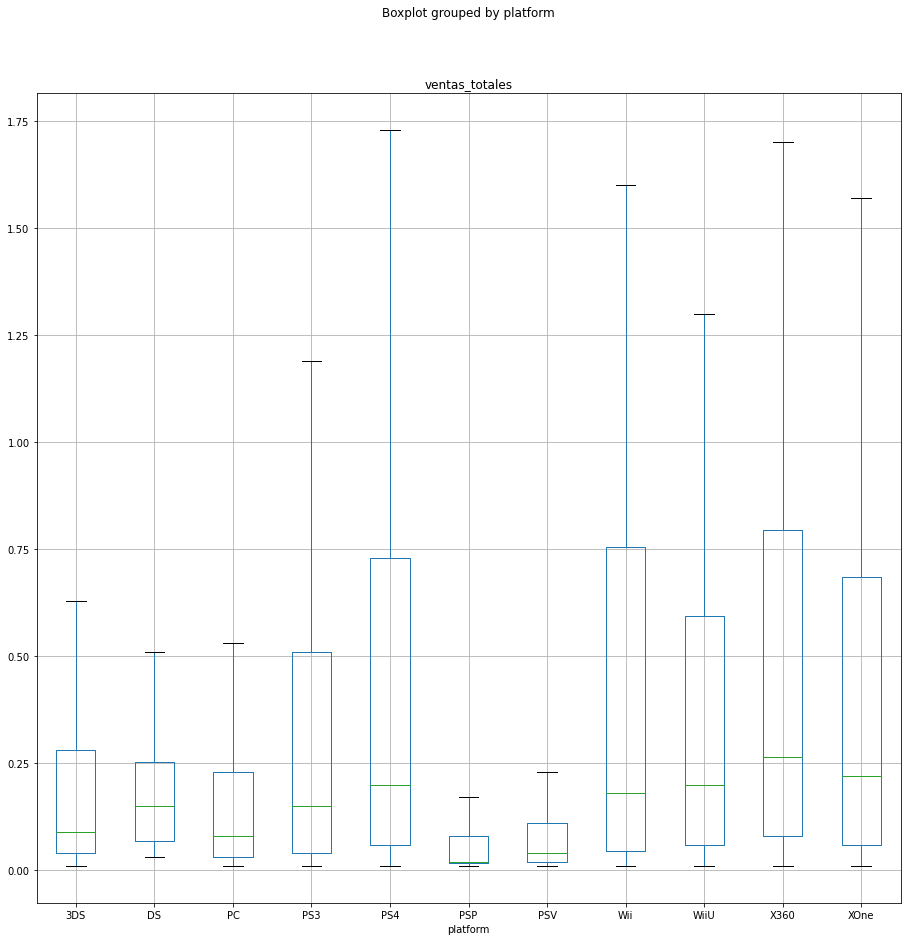

In [ ]:
# Diagrama de caja para las ventas globales por plataforma 

datos_segmentados.boxplot( column='ventas_totales', by='platform', showfliers=False, figsize=(15,15))

En los gráficos de caja de arriba podemos observar que la mediana de las plataformas PS3, PS4, XOne y Wii son bastante similares. La distribución de los datos en la mayoría de los casos tiene sesgo hacia la derecha aunque la que tiene mayor sesgo es la plataforma PS4. Si bien la plataforma WiiU no aparece entre las mas vendidas, tiene una distribución my similar a las otras. 

              critic_score  user_score
critic_score      1.000000    0.485599
user_score        0.485599    1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

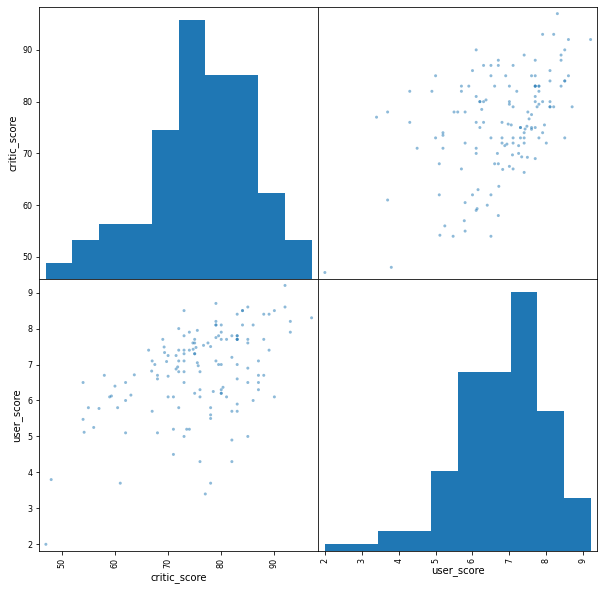

In [ ]:
# Correlación entre las reseñas de los usuarios y profesionales y las ventas de la plataforma PS4

correlacion= ps4.pivot_table(index='ventas_totales',values=['critic_score','user_score'])
print(correlacion.corr())
pd.plotting.scatter_matrix(correlacion, figsize=(10,10))

Podemos observar a través del gráfico de arriba que existe una correlación media entre las reseñas de los usuarios y profesionales y las ventas de la plataforma PS4.

A continuación veremos los juegos más vendidos para los datos segmentados, en que plataformas se venden y como se distribuyen esas ventas en las distintas plataformas.

In [ ]:
# Juegos más vendidos

juegos_vendidos= datos_segmentados.pivot_table(index='name', values='ventas_totales', aggfunc='sum').sort_values(by='ventas_totales', ascending=False).head()
juegos_vendidos

,ventas_totales
name,
Grand Theft Auto V,56.58
Call of Duty: Ghosts,27.39
Call of Duty: Black Ops 3,25.67
Minecraft,24.16
Call of Duty: Advanced Warfare,21.97


In [ ]:
# Juegos más vendidos y plataformas de venta

vtas_plataformas=datos_segmentados.query('name in("Grand Theft Auto V","Call of Duty: Ghosts","Call of Duty: Black Ops 3","Minecraft")')
vtas_plataformas

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,unknown,5.27


In [ ]:
# compara las ventas de los mismos juegos en otras plataformas.

juegos_mas_vendidos= vtas_plataformas.pivot_table(index='name',columns='platform', values = 'ventas_totales')
juegos_mas_vendidos

platform,PC,PS3,PS4,PSV,WiiU,X360,XOne
name,,,,,,,
Call of Duty: Black Ops 3,0.26,1.69,14.63,NaN,NaN,1.70,7.39
Call of Duty: Ghosts,0.69,9.36,3.83,NaN,0.35,10.24,2.92
Grand Theft Auto V,1.17,21.05,12.62,NaN,NaN,16.27,5.47
Minecraft,NaN,5.27,4.32,1.96,0.67,9.18,2.76


<AxesSubplot:xlabel='name'>

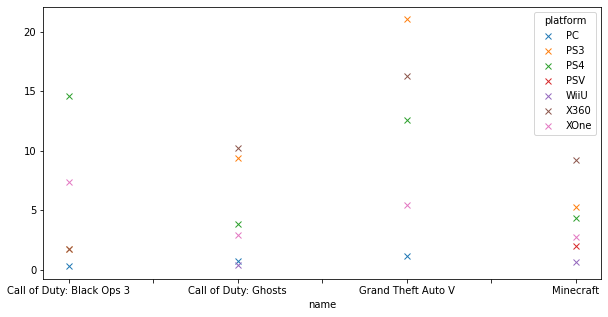

In [ ]:
juegos_mas_vendidos.plot(style='x', figsize=(10,5))

En esta sección, podemos observar que los juegos más vendidos en los últimos 4 años fueron Grand Theft Auto V, Call of Duty: Ghosts, Call of Duty: Black Ops 3 y Minecraft en ese orden. La mayoría se venden en distintas plataformas y todas se venden en las más populares a nivel global.

A continuación vere los géneros más vendidos: 

In [ ]:
# Géneros de videojuegos más vendidos

generos_mas_vendidos= datos_segmentados.pivot_table(index='genre', values='ventas_totales', aggfunc='sum').sort_values(by='ventas_totales', ascending=False).head()
generos_mas_vendidos

,ventas_totales
genre,
Action,322.50
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,63.06


Podemos observar que los géneros más populares son Action, Shooter, Sports, Role_Playing y Misc. Hacer un juego con alguno de estos géneros, especialmente las primeras 2 sería muy bueno.

<AxesSubplot:title={'center':'ventas_totales'}, xlabel='genre'>

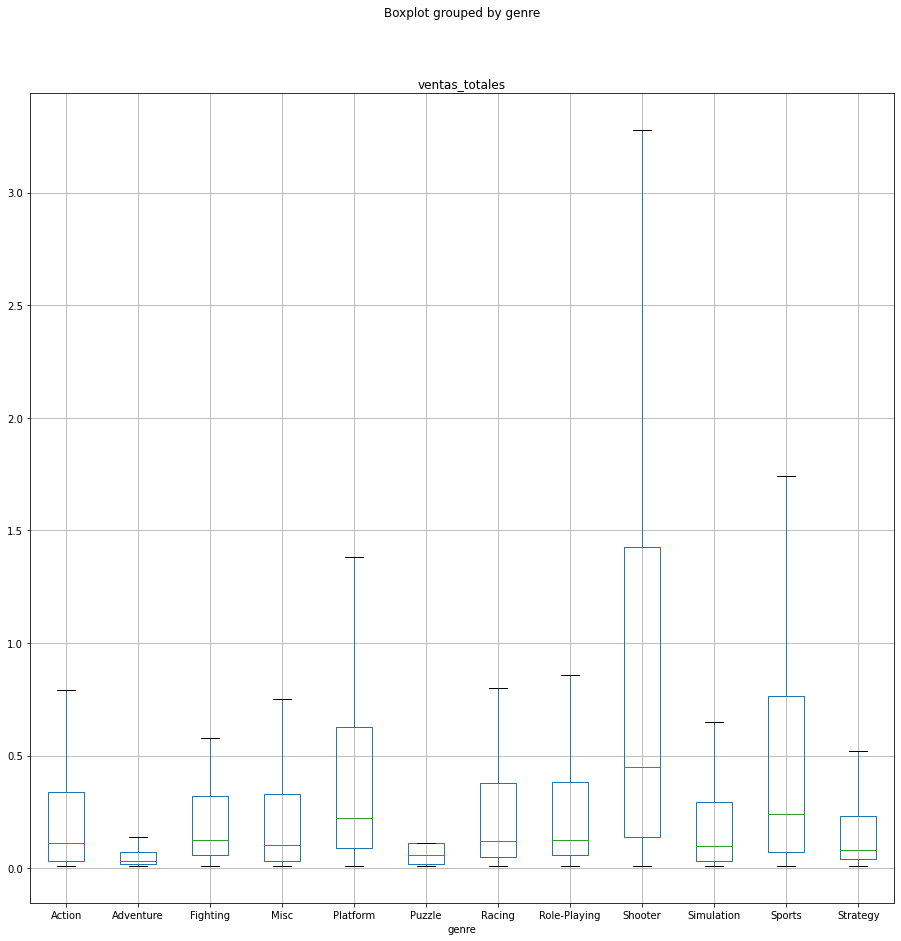

In [ ]:
# Comparación de las distribuciones 

datos_segmentados.boxplot( column='ventas_totales', by='genre', showfliers=False, figsize=(15,15))

Como podemos observar que la mayoría de las plataformas tienen sus datos sesgados a la derecha.

A continuación, armaré distintos perfiles para las regiones de NA, EU y JP y compararé sus resultados.

El primero tendrá las cinco plataformas más populares en ventas para cada región.

El segundo tendrá los cinco generos más populares en cada región.

El tercer perfil tendrá las clasificaciones ESRB y las ventas de cada región.

In [ ]:
# Las cinco plataformas principales en NA, UE, JP

plataformas_na= datos_segmentados.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
plataformas_eu= datos_segmentados.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
plataformas_jp= datos_segmentados.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

u1= pd.merge(plataformas_na,plataformas_eu, on= 'platform', how= 'outer')
plataformas_princ= pd.merge(u1,plataformas_jp, on= 'platform', how= 'outer')
plataformas_princ

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,NaN
X360,81.66,42.52,NaN
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81
PSV,NaN,NaN,18.59
WiiU,NaN,NaN,10.88


Como podemos observar, na_sales y eu_sales comparten las mismas 5 plataforms más populares siendo PS4 la principal en ambas. En el caso de NA la siguen XOne y X360 como plataformas principales. En el caso de EU, en segundo lugar se encuentra PS3 seguida por XOne. En el caso de jp_sales, podemos observar que la plataforma más popular es 3DS seguida por PS3. XOne y X360 no aparecen entre las más populares de Japón sino que aparecen PSV y WiiU (estas no aparecen entre las más populares en Norteamérica y Europa).  

Para concluir, podemos observar que las plataformas que comparten las tres regiones son: PS4, PS3 y 3DS teniendo mayores ingresos PS4. 

In [ ]:
#Los cinco géneros principales para cada región

generos_na= datos_segmentados.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
generos_eu= datos_segmentados.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
generos_jp= datos_segmentados.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

u2= pd.merge(generos_na,generos_eu, on= 'genre', how= 'outer')
generos_princ= pd.merge(u2,generos_jp, on= 'genre', how= 'outer')
generos_princ

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.13,118.61,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,NaN
Role-Playing,46.40,36.97,51.04
Misc,27.49,NaN,9.44
Racing,NaN,20.19,NaN
Fighting,NaN,NaN,7.65


Como podemos observar, action, shooter y role-playing aparecen dentro de los géneros más populares de las tres regiones. En el caso de action, podemos observar que es el género más popular en NA y EU mientras que el más popular en Japón es Role-Playing.
Racing solo aparece en EU dentro de los generos principales aunque en último lugar, con muchas menos ventas que action que es el principal. 

En el caso de Japón, podemos observar que dentro de los más populares aparece fighting que no aparecen en las otras dos regiones aunque con ventas muy inferiores a su más popular: role-playing.



In [ ]:
# Clasificaciones de ESRB y ventas en las regiones 

print('Ventas totales EU:','$',datos_segmentados['eu_sales'].sum())
print('Ventas totales JP:','$', datos_segmentados['jp_sales'].sum())
print('Ventas totales NA:','$', datos_segmentados['na_sales'].sum())
datos_segmentados.pivot_table(index='rating', values=('jp_sales','na_sales','eu_sales','ventas_totales'), aggfunc='sum')

Ventas totales EU: $ 392.71
Ventas totales JP: $ 141.02
Ventas totales NA: $ 437.79


,eu_sales,jp_sales,na_sales,ventas_totales
rating,,,,
E,83.36,15.14,79.05,200.16
E10+,42.69,5.89,54.24,115.39
M,145.80,14.11,165.29,372.31
T,41.95,20.59,49.79,126.62
unknown,78.91,85.29,89.42,277.08


Como podemos observar en el cuadro de arriba, hay muchos videojuegos sin identificación de categoría. En el caso de EU, los videojuegos sin clasificación ocupan un 20% de las ventas, en NA ocupan un 20% y en JP ocupan el 60%.

Los videojuegos clasificados para mayores de 17 (M) tienen una gran venta en EU y NA según la info con la que contamos.

En EU y NA, la segunda clasificación más elegida es E (apto para todo público), luego los E10+(mayores de 10 años) y por último, en menor medida, los T (teen)

En el caso de de JP, hay poca diferencia entre los generos; en segundo lugar estan los juegos E, luego M y en último lugar bastante alejado esta E10+

## Prueba de hipótesis

A continuación haré las pruebas de hipótesis. Antes de realizar dicha prueba, realizaré la prueba de levene para ver si las varianzas de las muestras son iguales o no. 


### Prueba 1

Voy a probar si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Ho:las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no difieren.
H alternativa: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren.

In [ ]:
# Prueba de hipotesis nula levene: varianzas son iguales 

datos_pc= datos_segmentados.query('platform == "PC"')
datos_xone= datos_segmentados.query('platform == "XOne"')


clasificacion_pc= datos_pc['user_score'].dropna()
clasificacion_xone=datos_xone['user_score'].dropna()

alpha= 0.05

stat,results= levene(clasificacion_xone, clasificacion_pc)
print('P_value:', results)

if results < alpha:
    print('Rechazo la hipótesis nula')
else:
    print('No rechazo la hipótesis nula')

P_value: 0.0042072165032298915
Rechazo la hipótesis nula


In [ ]:
# Hipótesis nula: la calificación de los usuarios para la plataformas Xbox One y PC no difieren.


alpha= 0.05

results= st.ttest_ind(clasificacion_xone, clasificacion_pc, equal_var=False)
print('P_value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazo la hipótesis nula')
else: 
    print('No rechazo la hipótesis nula')

P_value: 0.16174359801784308
No rechazo la hipótesis nula


Con la información con la que contamos, no nos da razones suficientes para rechazar la hipotesis nula. La calificación de los usuarios para la plataformas Xbox One y PC no difieren.

### Prueba 2

En esta segunda prueba de hipótesis, probaré si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

HO: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no difieren.
H alternativa: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes difieren.

Primero realizaré la prueba de levene para analizar las varianzas.

In [ ]:
# Prueba de hipotesis nula levene: varianzas son iguales 


datos_accion= datos_segmentados.query('genre == "Action"')
datos_deporte= datos_segmentados.query('genre == "Sports"')


clasificacion_accion= datos_accion['user_score'].dropna()
clasificacion_deporte=datos_deporte['user_score'].dropna()

alpha= 0.05

stat,results= levene(clasificacion_deporte, clasificacion_accion)
print('P_value:', results)

if results < alpha:
    print('Rechazo la hipótesis nula')
else:
    print('No rechazo la hipótesis nula')

P_value: 4.241765365098557e-07
Rechazo la hipótesis nula


In [ ]:
# Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no difieren


alpha= 0.05

results= st.ttest_ind(clasificacion_deporte, clasificacion_accion, equal_var=False)
print('P_value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazo la hipótesis nula')
else: 
    print('No rechazo la hipótesis nula')

P_value: 1.3883444596405356e-20
Rechazo la hipótesis nula


Con los datos que tenemos, podemos decir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes difieren.

## Conclusión

Para concluir, en vistas de detectar proyectos prometedores y planificar campañas publicitarias para el proximo año, podemos decir que a nivel global, las plataformas más populares para invertir son PS4 y XOne. Estas plataformas se encuentran en crecimiento lo que hace pensar que van a seguir en crecimiento un par de años más. PS3 también estuvo dentro de las más populares, de hecho es la segunda más elegida. Si bien sus ventas van en descenso, siguen siendo mayores a las de XOne que esta en crecimiento.Es una buena opción pero considero que PS4 y XOne son mejores para invertir. 

Con respecto a los géneros de los juegos, a nivel global, los más vendidos son action, shooter, sports y role playing. Estos géneros son todas buenas opciones siendo shooter y action las dos mejores.

A la hora de mirar las distintas regiones, la plataforma más rentable en EU y NA es PS4 por amplia mayoría. Como segunda opción tenemos en NA a XOne y en EU PS3. Con respecto a JP, si bien aparece entre las más populares PS4, la más popular es 3DS. A la hora de hacer alguna inversión en esa región, esa plataforma es altamente recomendable teniendo en  cuenta los pocos datos que tenemos para esa región.

Con respecto a los géneros más populares en las distintas regiones, la más popular en NA y EU es action. Lanzar videojuego de ese género es buena opción. Como segunda opción en ambos tenemos a shooter. En JP, el género más popular es role-playing y como segunda opción action.

Por último, NA y EU vuelven a coinsidir teniendo como clasificación ESRB más usada: M ( juegos para mayores de 17 años) mientras que JP usa: T (teen).